In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Activation,Flatten,Conv2D,MaxPooling2D,Dropout,Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array , load_img
from keras import backend as K
from keras.preprocessing import image
from keras.models import Sequential,load_model
from keras.callbacks import EarlyStopping

In [96]:
from google.colab import drive  
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [263]:
cd /content/drive/My Drive/dnn

/content/drive/My Drive/dnn


In [98]:
base_path = 'dataset'
train_path = 'dataset/train'
test_path = 'dataset/test'

In [99]:
img_width,img_height=150,150
batch_size=10

In [100]:
 input_shape=(img_width,img_height,3)

In [264]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,rotation_range=30)
image = train_datagen.flow_from_directory(train_path,target_size=(img_width,img_height),batch_size=438,class_mode='binary',save_to_dir='augmented_train',save_prefix='A_train')

Found 438 images belonging to 2 classes.


In [274]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,rotation_range=30)
image = train_datagen.flow_from_directory(train_path,target_size=(img_width,img_height),batch_size=438,class_mode='binary',save_to_dir='augmented_train',save_prefix='A_train')
image.next()

Found 438 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


(array([[[[0.00784314, 0.18431373, 0.3137255 ],
          [0.00784314, 0.18431373, 0.3137255 ],
          [0.00784314, 0.18431373, 0.3137255 ],
          ...,
          [0.04313726, 0.6745098 , 0.6039216 ],
          [0.04281003, 0.67472804, 0.6039216 ],
          [0.04098126, 0.6759472 , 0.6039216 ]],
 
         [[0.00784314, 0.18431373, 0.3137255 ],
          [0.00784314, 0.18431373, 0.3137255 ],
          [0.00784314, 0.18431373, 0.3137255 ],
          ...,
          [0.03136337, 0.68235296, 0.6039216 ],
          [0.03075378, 0.68235296, 0.6039216 ],
          [0.03014419, 0.68235296, 0.6039216 ]],
 
         [[0.00784314, 0.18431373, 0.3137255 ],
          [0.00784314, 0.18431373, 0.3137255 ],
          [0.00784314, 0.18431373, 0.3137255 ],
          ...,
          [0.02693212, 0.6828718 , 0.6039216 ],
          [0.02632252, 0.6834814 , 0.6039216 ],
          [0.02571294, 0.68409103, 0.6039216 ]],
 
         ...,
 
         [[0.7838133 , 0.8347937 , 0.86616623],
          [0.78320

In [275]:
import os
folder_path='/content/drive/My Drive/dnn/augmented_train'
images = []
for i in os.listdir(folder_path):
  images.append(i)
print(len(images))

3066


In [276]:
test_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True)
image = test_datagen.flow_from_directory(test_path,target_size=(img_width,img_height),batch_size=53,class_mode='binary',save_to_dir='augmented_test',save_prefix='A_test')

Found 53 images belonging to 2 classes.


In [281]:
test_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True)
image = test_datagen.flow_from_directory(test_path,target_size=(img_width,img_height),batch_size=53,class_mode='binary',save_to_dir='augmented_test',save_prefix='A_test')
image.next()

Found 53 images belonging to 2 classes.


(array([[[[0.01960784, 0.01960784, 0.01960784],
          [0.00784314, 0.00784314, 0.00784314],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.02352941, 0.02352941, 0.02352941],
          [0.01176471, 0.01176471, 0.01176471],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.01568628, 0.01568628, 0.01568628],
          [0.00784314, 0.00784314, 0.00784314],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [282]:
import os
folder_path='/content/drive/My Drive/dnn/augmented_test'
images = []
for i in os.listdir(folder_path):
  images.append(i)
print(len(images))

159


In [283]:
train_generator=train_datagen.flow_from_directory(train_path,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(test_path,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')

Found 438 images belonging to 2 classes.
Found 53 images belonging to 2 classes.


In [177]:
#building a neural network(Input-conv-pooling-fully connected layer)
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())#2-d array to 1-d array
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # 32-nodes to 1 final node
 # relu-0 or 1,sigmoid- Probability'''
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               22429824  
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 22,430,849
Trainable params: 22,430,849
Non-trainable params: 0
_________________________________________________________________


In [178]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

In [179]:
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [180]:
from matplotlib import pyplot

In [183]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
history=model.fit_generator(train_generator,epochs=50,validation_data=validation_generator,callbacks=[earlystopping])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
31/44 [====================>.........] - ETA: 5s - loss: 0.5754 - accuracy: 0.7452

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


44/44 [==============================] - 22s 490ms/step - loss: 0.5531 - accuracy: 0.7420 - val_loss: 0.4292 - val_accuracy: 0.9057
Epoch 2/50
44/44 [==============================] - 21s 470ms/step - loss: 0.5122 - accuracy: 0.7489 - val_loss: 0.3653 - val_accuracy: 0.9057
Epoch 3/50
44/44 [==============================] - 22s 481ms/step - loss: 0.5379 - accuracy: 0.7626 - val_loss: 0.3407 - val_accuracy: 0.8491
Epoch 4/50
44/44 [==============================] - 22s 490ms/step - loss: 0.5007 - accuracy: 0.7694 - val_loss: 0.4062 - val_accuracy: 0.8679
Epoch 5/50
44/44 [==============================] - 21s 479ms/step - loss: 0.5053 - accuracy: 0.7626 - val_loss: 0.4704 - val_accuracy: 0.8868
Epoch 6/50
44/44 [==============================] - 21s 472ms/step - loss: 0.4983 - accuracy: 0.7580 - val_loss: 0.3425 - val_accuracy: 0.8868
Epoch 7/50
44/44 [==============================] - 21s 475ms/step - loss: 0.4975 - accuracy: 0.7763 - val_loss: 0.3163 - val_accuracy: 0.8679
Epoch 8/50

In [284]:
cd /content/drive/My Drive/dnn

/content/drive/My Drive/dnn


In [285]:
model.save('1.h5')

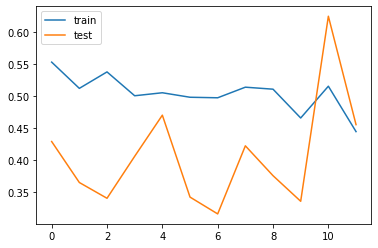

In [286]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

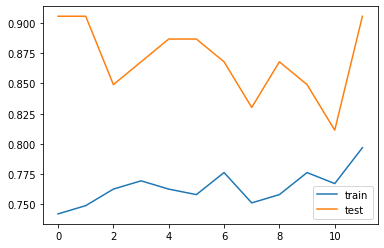

In [287]:
from keras import callbacks
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [288]:
def pred_clean(pred):
  if pred > 0.55:
    return 1
  else:
    return 0

def pred_class(pred):
  res = pred_clean(pred)
  labels = ['Bullying','Non-Bullying']
  return labels[res]

In [289]:
cd /content/drive/My Drive/dnn/dataset/train/NoBulling

/content/drive/My Drive/dnn/dataset/train/NoBulling


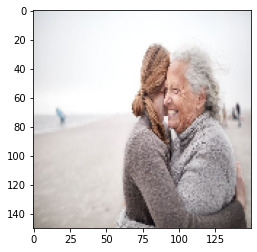

In [290]:
img_file = '/content/drive/My Drive/dnn/dataset/train/NoBulling/0_Affectionate-grandmother-and-granddaughter-hugging-on-the-beach.jpg'
image = load_img(img_file,target_size=(150,150))
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image,axis=0)
image = image / 255

In [291]:
res = model.predict(image)
print(res[0])

[0.7708688]


In [292]:
pred = pred_class(res)
pred

'Non-Bullying'

In [293]:
cd /content/drive/My Drive/dnn/dataset/train/Bulling

/content/drive/My Drive/dnn/dataset/train/Bulling


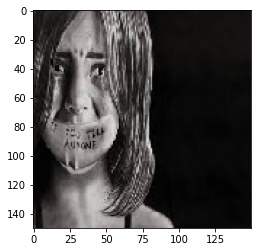

In [294]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array , load_img
img_file = '/content/drive/My Drive/dnn/dataset/train/Bulling/10 (1).jfif'
image = load_img(img_file,target_size=(150,150))
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image,axis=0)
image = image / 255

In [295]:
res = model.predict(image)
print(res[0])

[0.00432339]


In [296]:
pred = pred_class(res)
pred

'Bullying'

In [298]:
cd /content/drive/My Drive/dnn/dataset/train/NoBulling

/content/drive/My Drive/dnn/dataset/train/NoBulling


In [233]:
pwd

'/content/drive/My Drive/dnn/dataset/train/NoBulling'

In [299]:
import os
folder_path='/content/drive/My Drive/dnn/dataset/train/NoBulling'
images = []
for i in os.listdir(folder_path):
    i = load_img(i,target_size=(150,150))
    i = img_to_array(i)
    i = np.expand_dims(i, axis=0)
    i=i/255
    images.append(i)
images = np.vstack(images)
res = model.predict(images, batch_size=10)
NonBullying_res=res
print(res)

[[0.7577784 ]
 [0.53631765]
 [0.7708688 ]
 [0.6825176 ]
 [0.998584  ]
 [0.6226774 ]
 [0.89052016]
 [0.9771686 ]
 [0.9473836 ]
 [0.9348954 ]
 [0.9919332 ]
 [0.98512995]
 [0.9504951 ]
 [0.9566544 ]
 [0.96971714]
 [0.9786742 ]
 [0.9789053 ]
 [0.97086906]
 [0.97338843]
 [0.5456813 ]
 [0.999665  ]
 [0.9423268 ]
 [0.95849645]
 [0.7234848 ]
 [0.88187397]
 [0.67275083]
 [0.58194697]
 [0.87377304]
 [0.99915606]
 [0.7875511 ]
 [0.67105746]
 [0.64095205]
 [0.9955136 ]
 [0.75492823]
 [0.93914235]
 [0.5361607 ]
 [0.93018854]
 [0.81884754]
 [0.61746985]
 [0.77418137]
 [0.9782847 ]
 [0.79011476]
 [0.540675  ]
 [0.06917968]
 [0.42666316]
 [0.837975  ]
 [0.15515831]
 [0.79174   ]
 [0.8975897 ]
 [0.2511018 ]
 [0.9833764 ]
 [0.9517018 ]
 [0.8957866 ]
 [0.7159994 ]
 [0.7934165 ]
 [0.8029578 ]
 [0.932773  ]
 [0.9409014 ]
 [0.5857951 ]
 [0.99184436]
 [0.8010961 ]
 [0.8259336 ]
 [0.8402812 ]
 [0.15859756]
 [0.9089099 ]
 [0.819455  ]
 [0.98404837]
 [0.6988047 ]
 [0.77047735]
 [0.9401516 ]
 [0.96935904]
 [0.86

In [300]:
cd /content/drive/My Drive/dnn/dataset/train/Bulling

/content/drive/My Drive/dnn/dataset/train/Bulling


In [301]:
import os
folder_path='/content/drive/My Drive/dnn/dataset/train/Bulling'
images = []
for i in os.listdir(folder_path):
    i = load_img(i,target_size=(150,150))
    i = img_to_array(i)
    i = np.expand_dims(i, axis=0)
    i=i/255
    images.append(i)
images = np.vstack(images)
res = model.predict(images, batch_size=10)
Bullying_res=res
print(res)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


[[2.72444487e-01]
 [1.16155863e-01]
 [4.40173328e-01]
 [1.95314169e-01]
 [5.43290973e-02]
 [3.15829813e-01]
 [6.20701909e-03]
 [2.52694726e-01]
 [6.72699153e-01]
 [5.09886205e-01]
 [7.19634891e-01]
 [2.61857241e-01]
 [5.32973468e-01]
 [6.76308870e-02]
 [5.82665443e-01]
 [1.68768615e-01]
 [5.90746760e-01]
 [8.78889322e-01]
 [8.72481585e-01]
 [1.21158361e-03]
 [7.22199559e-01]
 [8.59583020e-02]
 [1.58093363e-01]
 [1.11305743e-01]
 [2.27530181e-01]
 [4.04562354e-01]
 [6.21218169e-06]
 [9.32560265e-01]
 [6.34041607e-01]
 [8.05573702e-01]
 [1.23043358e-01]
 [8.36573124e-01]
 [7.35233188e-01]
 [1.94648027e-01]
 [5.88015616e-01]
 [1.66406125e-01]
 [8.66689146e-01]
 [3.21943760e-02]
 [2.88339376e-01]
 [7.85893321e-01]
 [1.15999281e-01]
 [6.28364205e-01]
 [6.44006610e-01]
 [3.06967199e-02]
 [4.56437230e-01]
 [1.29658580e-01]
 [7.69773006e-01]
 [2.24597096e-01]
 [9.18253064e-02]
 [2.46830404e-01]
 [5.60055971e-02]
 [8.37041140e-01]
 [3.77961278e-01]
 [6.04641736e-01]
 [2.69886851e-03]
 [2.870328

In [237]:
 res=7.6823902e-01
 print(res)

0.76823902


In [302]:
cd /content/drive/My Drive/dnn/dataset/test/Bulling

/content/drive/My Drive/dnn/dataset/test/Bulling


In [303]:
import os
folder_path='/content/drive/My Drive/dnn/dataset/test/Bulling'
images = []
for i in os.listdir(folder_path):
    i = load_img(i,target_size=(150,150))
    i = img_to_array(i)
    i = np.expand_dims(i, axis=0)
    i=i/255
    images.append(i)
images = np.vstack(images)
res = model.predict(images, batch_size=10)
Bullying_res=res
#print(res)

In [304]:
cd /content/drive/My Drive/dnn/dataset/test/NoBulling

/content/drive/My Drive/dnn/dataset/test/NoBulling


In [305]:
import os
folder_path='/content/drive/My Drive/dnn/dataset/test/NoBulling'
images = []
for i in os.listdir(folder_path):
    i = load_img(i,target_size=(150,150))
    i = img_to_array(i)
    i = np.expand_dims(i, axis=0)
    i=i/255
    images.append(i)
images = np.vstack(images)
res = model.predict(images, batch_size=10)
NonBullying_res=res
#print(res)

In [306]:
#test-accuracy
#class-wise accuracy based on the threshold - Bullying
i=0
B_count=0
for i in range(len(Bullying_res)):
    if(Bullying_res[i]<0.55):
      B_count+=1
print((B_count/len(Bullying_res))*100)

89.1891891891892


In [307]:
i=0
NB_count=0
for i in range(len(NonBullying_res)):
    if(NonBullying_res[i]>=0.55):
      NB_count+=1
print((NB_count/len(NonBullying_res))*100)

90.0


In [308]:
total_accuracy=(B_count+NB_count)/(len(Bullying_res)+len(NonBullying_res))*100
print(total_accuracy)

89.47368421052632
